In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import scrublet as scr
import os
import warnings
import functools
import seaborn as sns
import scipy.stats
import anndata
import dandelion as ddl
sc.logging.print_header()

warnings.filterwarnings('ignore')
os.chdir('/lustre/scratch117/cellgen/team297/kt16/Ziad/scanpy')

scanpy==1.7.1 anndata==0.7.5 umap==0.5.1 numpy==1.19.4 scipy==1.6.0 pandas==1.2.3 scikit-learn==0.23.2 statsmodels==0.12.1 python-igraph==0.8.3 leidenalg==0.8.3


In [2]:
rna = sc.read_h5ad('h5ad/adata_soupx_trans_cite_rna.h5ad')

In [3]:
adata = rna[rna.obs['fine_clustering'] == 'CD4_Treg'].copy()

In [4]:
adata.obs['treatment_timepoint'] = [a +'_' + b for a,b in zip(adata.obs['treatment'], adata.obs['timepoint'])]
adata.obs['treatment_timepoint'] = adata.obs['treatment_timepoint'].astype('category')
adata.obs['treatment_timepoint'] = adata.obs['treatment_timepoint'].cat.reorder_categories(['Saline_pre', '1.5MIU_pre', '2.5MIU_pre', 'Saline_post', '1.5MIU_post', '2.5MIU_post'])

In [5]:
lde = pd.read_csv('figures/gsea/CD4Treg_leadingedgegenes.csv')
lde

,EPITHELIAL_MESENCHYMAL_TRANSITION,IL2_STAT5_SIGNALING,MTORC1_SIGNALING,GLYCOLYSIS,HYPOXIA,OXIDATIVE_PHOSPHORYLATION
0,LGALS1,CISH,GAPDH,ENO1,S100A4,ATP5MC2
1,IL32,LTB,ENO1,PPIA,GAPDH,COX6B1
2,FLNA,IL2RA,PPIA,GLRX,ENO1,ATP5F1E
3,TPM4,TNFRSF18,CTSC,TXN,PIM1,COX5A
4,TGFB1,PIM1,GLRX,ISG20,GLRX,COX8A
...,...,...,...,...,...,...
59,NaN,NaN,NaN,NaN,NaN,ATP6V1G1
60,NaN,NaN,NaN,NaN,NaN,COX7A2L
61,NaN,NaN,NaN,NaN,NaN,ATP6V0B
62,NaN,NaN,NaN,NaN,NaN,GPI


In [8]:
genes = {}
for x in lde:
    genes[x] = [y for y in lde[x] if pd.notnull(y)]

In [9]:
a_keys_to_extract = ['EPITHELIAL_MESENCHYMAL_TRANSITION','IL2_STAT5_SIGNALING']
b_keys_to_extract = ['GLYCOLYSIS', 'MTORC1_SIGNALING', 'HYPOXIA']
c_keys_to_extract = ['OXIDATIVE_PHOSPHORYLATION']
a_subset = {key: genes[key] for key in a_keys_to_extract}
b_subset = {key: genes[key] for key in b_keys_to_extract}
c_subset = {key: genes[key] for key in c_keys_to_extract}

In [10]:
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

In [24]:
new_a = {}
for a in a_subset:
    new_a[a] = a_subset[a][0:6]
new_b = {}
for b in b_subset:
    new_b[b] = b_subset[b][0:6]
new_c = {'Complex I':['NDUFB4', 'NDUFA6', 'NDUFB2', 'NDUFA1', 'NDUFV2', 'NDUFA2'],
         'Complex II':['SDHB'],
         'Complex III':['UQCRQ', 'UQCR10', 'UQCRH', 'UQCRB', 'UQCR11'],
         'Complex IV':['COX6B1', 'COX5A', 'COX8A', 'COX7A2', 'COX7C', 'COX6A1'],
         'Complex V':['ATP5MC2', 'ATP5F1E', 'ATP5MG', 'ATP6V1F', 'ATP5PF', 'ATP5MF']}

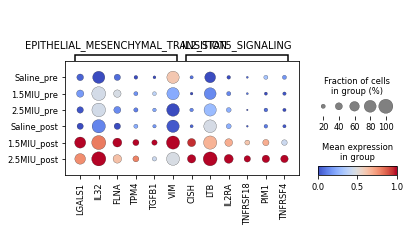

In [33]:
sc.pl.dotplot(adata, new_a, groupby = 'treatment_timepoint', var_group_rotation = 0, standard_scale = 'var', color_map = 'coolwarm', save = 'lde1.pdf')

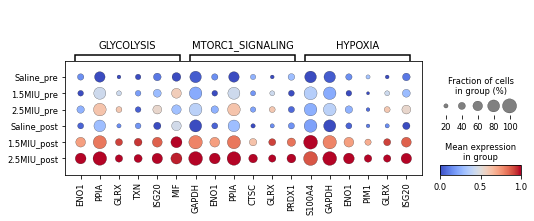

In [34]:
sc.pl.dotplot(adata, new_b, groupby = 'treatment_timepoint', var_group_rotation = 0, standard_scale = 'var', color_map = 'coolwarm', save = 'lde2.pdf')

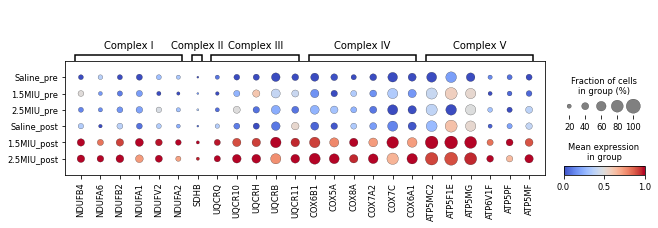

In [36]:
sc.pl.dotplot(adata, new_c, groupby = 'treatment_timepoint', var_group_rotation = 0, standard_scale = 'var', color_map = 'coolwarm', save = 'lde3.pdf', dot_max = 1)